# Feature Engineering by rows
## Alcoholic

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from os import listdir
root="./datasetAlcoholic";


# It is going to take a while to read all the data
linecounter= 0
filecounter=0
df = pd.DataFrame(columns=['user_id', 'alcoholic', 'paradigm','replication','Channel','Min','Max','Sd','Mean',
                               'Median','IQR','0.025','0.25','0.5','0.75','0.975'])
cont=0;
for file in listdir("./datasetAlcoholic"):


        # Renaming the file
        
        filecounter= filecounter + 1
        
        file_root = root + "/" + file
        print(file_root)
        if(file!=".DS_Store"):
            read_file = open(file_root, 'r')
            read_file.readline()
            counterinside=0
            user = []
            alcoholic=[]
            paradigm=[]
            replication=[]
            channel=[]
           
            # For each line we separate the values to add them in the created dataframe
            for line in read_file:
                if(filecounter<=5):
                    linecounter= linecounter + 1
                
                firstline = line.split("  ")
                lineeg=[]

                for i in range(len(firstline)-1):
                    

                    if i==0:
                        user.append(float(firstline[i]))
                    elif i==1:
                        alcoholic.append(firstline[i])

                    elif i==2:

                        paradigm.append(firstline[i])

                    if i==3:

                        replication.append(float(firstline[i]))
                    elif i>=4:
                        if i==4:
                            channelline=firstline[i].split(" ")
                            channel.append(channelline[0])
                            if channelline[1][0]=='c':
                                canal=channelline[1][1:]
                                lineeg.append(float(canal))

                            else:
                                lineeg.append(float(channelline[1]))

                        else:
                            lineeg.append(float(firstline[i]))

              
                datachannel = pd.DataFrame(lineeg)
                min = datachannel.min()
                max = datachannel.max()
                sd = datachannel.std()
                mean = datachannel.mean()
                quantil0=datachannel.quantile(.025)
                quantil1=datachannel.quantile(.25)
                median=datachannel.quantile(.5)
                quantil3=datachannel.quantile(.75)
                quantil4=datachannel.quantile(.975)
                iqr=quantil3[0]-quantil1[0]
                # counterinside is the one which goes through the lines of the current file
                # cont is the counter which goes through all the files
                df.loc[cont]=[user[counterinside],alcoholic[counterinside],paradigm[counterinside],replication[counterinside],channel[counterinside],min[0],max[0],
                              sd[0],mean[0],median[0],iqr,quantil0[0],quantil1[0],median[0],quantil3[0],quantil4[0]]
               
                cont= cont +1
                counterinside= counterinside + 1

./datasetAlcoholic/co2a0000377.txt
./datasetAlcoholic/co2a0000375.txt
./datasetAlcoholic/co2a0000370.txt
./datasetAlcoholic/co2a0000364.txt
./datasetAlcoholic/co2a0000365.txt
./datasetAlcoholic/co2a0000371.txt
./datasetAlcoholic/co2a0000372.txt
./datasetAlcoholic/co2a0000368.txt
./datasetAlcoholic/co2a0000369.txt
./datasetAlcoholic/co2a0000378.txt


## Separate target and features



In [45]:
from sklearn.preprocessing import StandardScaler

features =['Min','Max','Sd','Mean',
                           'Median','IQR','0.025','0.25','0.5','0.75','0.975']
# Separating explicatives variables off the target
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['alcoholic']].values
print(x)


# Standardizing the features
x = StandardScaler().fit_transform(x)

[[-19.43         7.426        5.34563497 ...  -7.222       -3.68275
    5.473     ]
 [-15.188        7.762        4.0258607  ...  -2.004        0.071
    6.114     ]
 [-22.502       12.166        7.82304055 ...  -4.924       -0.895
   10.518     ]
 ...
 [ -8.443        1.811        1.74080866 ...  -2.584       -1.607
    0.346     ]
 [-25.991        6.236        5.95207983 ...  -8.413       -4.506
    4.099625  ]
 [-20.589       22.868       10.23009692 ...   1.139        9.684
   20.426     ]]


## PCA

In [46]:

# Keeping 2 components
pca = PCA(n_components=2)
# Explicative variables transformation
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2'])
principalDf.head(10)

,component 1,component 2
0,2.400168,-0.839181
1,0.364205,-0.906347
2,2.297999,0.517850
3,-1.040573,-0.181924
4,2.119571,-1.493934
5,1.772996,-1.701955
6,2.406137,-1.870524
7,1.623993,-1.707908
8,2.591520,-1.580740
9,-0.258393,-0.932258


## Important explicative variables

In [47]:

pca.explained_variance_ratio_

array([0.53074284, 0.40629095])

### Relationship important data

In [48]:
df_1 = pd.DataFrame(x, columns=features)

# Normalized data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df_1),columns = df_1.columns) 

# PCA
pca = PCA(n_components=3)
pca.fit_transform(data_scaled)

# components related with explicative variables
pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2','PC-3'])
# The columns we are gonna keep are pc-1: 0.25, pc-2:Sd and pc

,Min,Max,Sd,Mean,Median,IQR,0.025,0.25,0.5,0.75,0.975
PC-1,-0.332730,-0.086284,0.129563,-0.395307,-0.395446,0.136844,-0.354900,-0.396287,-0.395446,-0.284283,-0.116169
PC-2,-0.235402,0.430279,0.446824,0.137837,0.103633,0.415908,-0.216813,-0.111981,0.103633,0.320125,0.429312
PC-3,0.231406,0.508879,0.081390,-0.029394,-0.251108,-0.402286,0.217333,0.051858,-0.251108,-0.370833,0.452350


## Alcoholic graph

In [49]:
finalDf = pd.concat([principalDf, df[['alcoholic']]], axis = 1)

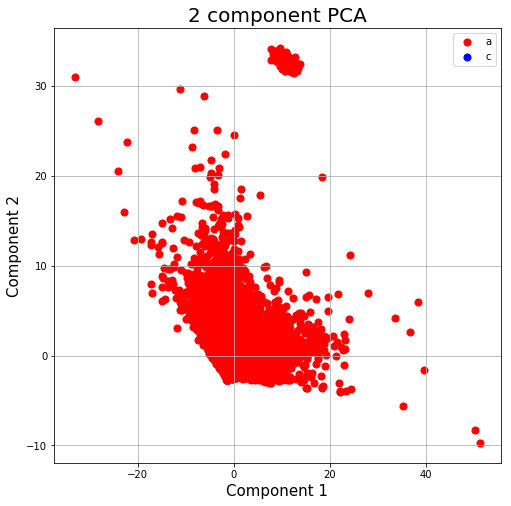

In [50]:

# Visualization of the alcoholic users
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['a', 'c']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['alcoholic'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
                ,finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

## Final Data

In [55]:
# It only has to be used once because of the unnecessary columns have been removed and we only take the three explicative variables 
# which are more relevant

#df= df.drop(df.columns[[5,6,7,8,9,10,11,12,13,14,15]], axis=1)
resultDf = pd.concat([df, principalDf], axis=1)
print(resultDf)



       user_id alcoholic paradigm  replication Channel  component 1  \
0        377.0         a    S1obj          0.0     FP1     2.400168   
1        377.0         a    S1obj          0.0     FP2     0.364205   
2        377.0         a    S1obj          0.0      F7     2.297999   
3        377.0         a    S1obj          0.0      F8    -1.040573   
4        377.0         a    S1obj          0.0     AF1     2.119571   
5        377.0         a    S1obj          0.0     AF2     1.772996   
6        377.0         a    S1obj          0.0      FZ     2.406137   
7        377.0         a    S1obj          0.0      F4     1.623993   
8        377.0         a    S1obj          0.0      F3     2.591520   
9        377.0         a    S1obj          0.0     FC6    -0.258393   
10       377.0         a    S1obj          0.0     FC5     1.849236   
11       377.0         a    S1obj          0.0     FC2     1.642839   
12       377.0         a    S1obj          0.0     FC1     2.237633   
13    